In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('mf_df_mapped_smoted.csv')
target = 'DC201'
df.head()

,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,DC212,...,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC142a,DC201
0,0,1,1,1,0,1,0,0,0,0,...,0,0,0,0,0,2,0,1,60,1
1,0,1,4,1,0,1,0,0,1,0,...,0,0,0,1,1,1,1,3,70,1
2,0,1,0,1,0,1,1,1,1,0,...,0,0,0,1,1,0,3,0,75,1
3,0,1,0,1,0,0,0,0,1,0,...,0,1,0,1,0,1,0,0,85,1
4,0,1,0,1,0,1,1,0,0,0,...,0,0,0,0,1,0,1,0,65,1


In [3]:
RANDOM_SEED = 42

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

y = np.array(df[target])
df_dropped = df.drop(target, axis=1) # drop target
X = np.array(df_dropped)

sc = StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=RANDOM_SEED)

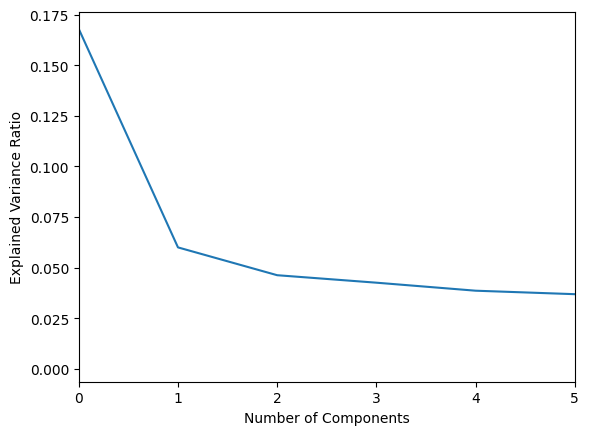

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA with all components
pca = PCA()
pca.fit(X_train)

# Plot the explained variance ratio
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')

# Set the tick locations and labels along the x axis
plt.xticks(range(0, len(pca.explained_variance_ratio_)))

# Set the tick locations and labels along the y axis
# plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.xlim(0,5)

# Show the plot
plt.show()

In [6]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.16793444, 0.06003725])

In [7]:
view_X_train = pd.DataFrame(X_train, columns=['pca1','pca2'])
view_X_train

,pca1,pca2
0,-0.541594,-1.711160
1,-3.775259,0.835214
2,-4.544461,0.867779
3,0.767161,-1.787956
4,4.046666,-0.269243
...,...,...
48592,1.030657,-2.213921
48593,0.108050,-3.089217
48594,-0.143637,-0.099483
48595,-0.047197,-3.155760


<Figure size 640x480 with 0 Axes>

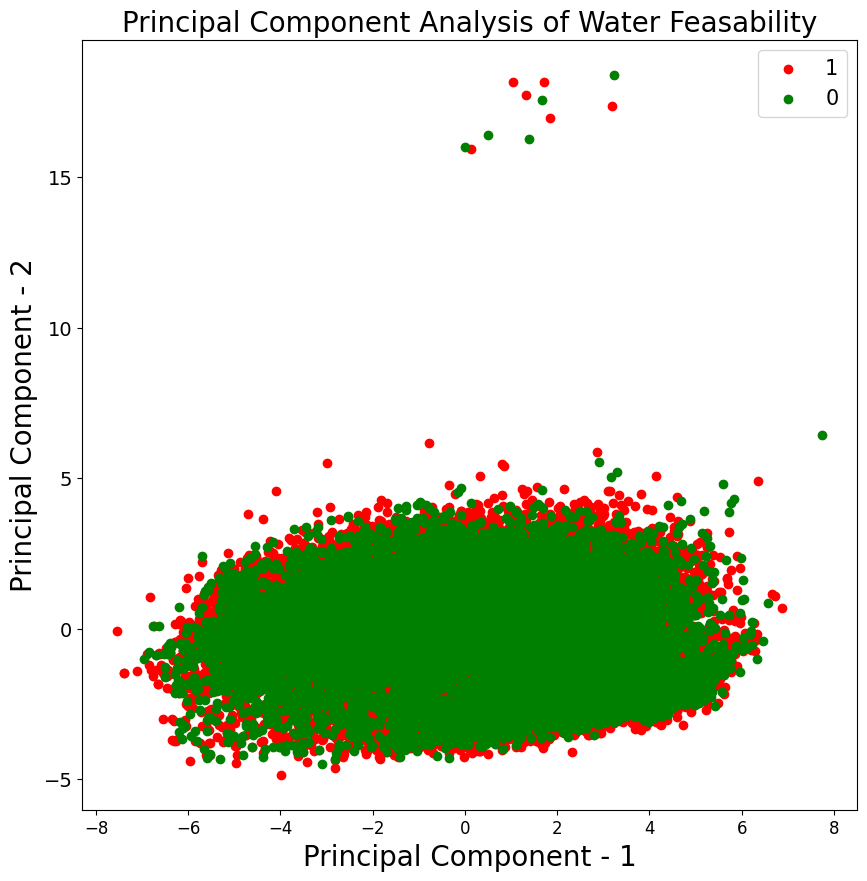

In [9]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Water Feasability",fontsize=20)
targets = [1, 0]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df['DC201'] == target
    plt.scatter(view_X_train.loc[indicesToKeep, 'pca1']
               , view_X_train.loc[indicesToKeep, 'pca2'], c = color)

plt.legend(targets,prop={'size': 15})